# MAC0417 - EP1
## Banco de Images
### Nome: Yesman Choque Mamani
### NUSP: 13643040

Vamos importar as bibliotecas necessárias para o desenvolvimento do EP1.

In [2]:
import os
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
image_dir = './images'
image_folders = os.listdir(image_dir)


In [4]:
images = {}

nomes_das_classes = []
numero_de_imagens = 0
tamanho_da_base = 0
resolucao_das_imagens = []

for folder in image_folders:
    images[folder] = {}
    for subfolder in os.listdir(os.path.join(image_dir, folder)):
        images[folder][subfolder] = {}
        for filename in os.listdir(os.path.join(image_dir, folder, subfolder)):
            img = Image.open(os.path.join(image_dir, folder, subfolder, filename))
            if len(resolucao_das_imagens) == 0:
                resolucao_das_imagens.append(img.size)
            images[folder][subfolder][filename] = np.array(img.resize((90,120)))
            if subfolder == 'classes':
                nomes_das_classes.append(filename.split('.')[0])
            numero_de_imagens += 1
            tamanho_da_base += os.path.getsize(os.path.join(image_dir, folder, subfolder, filename))


In [5]:
nomes_das_classes

['chave-roxa',
 'chave-amarela',
 'chave-preta',
 'escolar-lapis',
 'escolar-caneta',
 'escolar-lapiseira',
 'talher-colher',
 'talher-faca',
 'talher-garfo',
 'moeda-25',
 'moeda-50',
 'moeda-5']

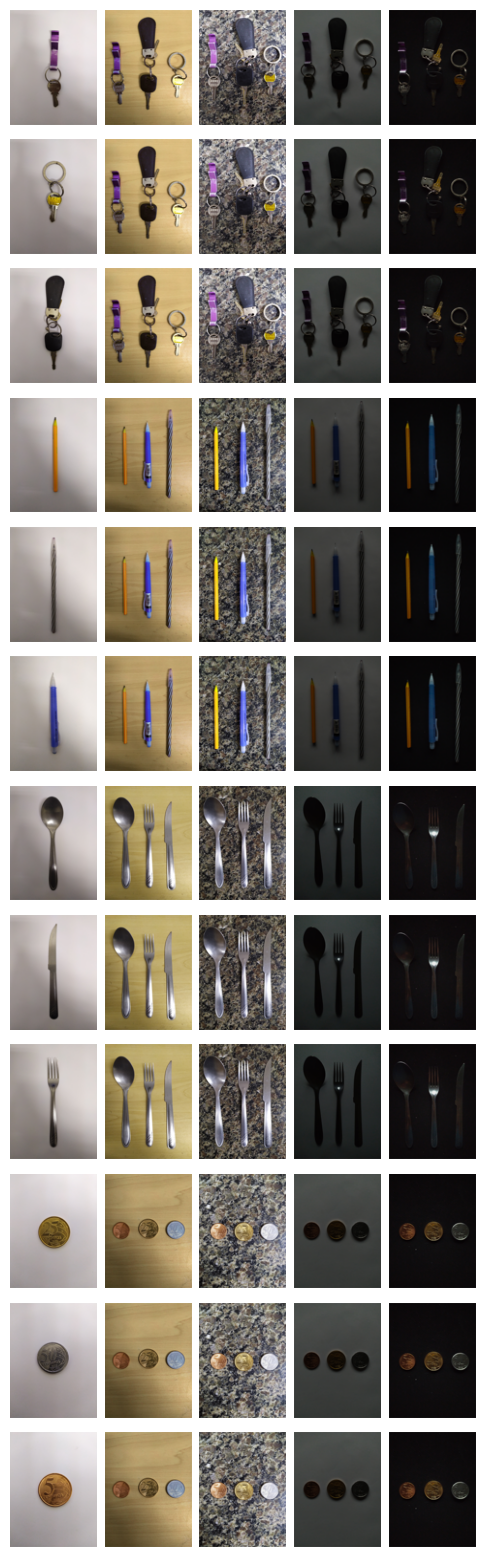

In [23]:
fig, axs = plt.subplots(len(images) * len(images['chaves']['classes']), 1 + len(images['chaves']['amostras']), figsize=(6, 20))

# Adjust the spacing between subplots

amostras = ['dia-dentro-madeira', 'dia-fora-granito', 'noite-dentro-papel', 'noite-fora-tapete']

for i, (folder, subfolder) in enumerate(images.items()):
    for j, (nome_da_classe, classe) in enumerate(subfolder['classes'].items()):
        axs[3 * i + j, 0].imshow(classe)
        axs[3 * i + j, 0].axis('off')
        
        for k, exemplo in enumerate(amostras):
            axs[3 * i + j, 1 + k].imshow(subfolder['amostras'][f'{folder}-{exemplo}.jpg'])
            axs[3 * i + j, 1 + k].axis('off')

plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()


In [7]:
numero_de_classes = len(nomes_das_classes)

dados = {
    'Nome das classes': ', '.join(nomes_das_classes),
    'Número de classes': numero_de_classes,
    'Número de imagens': numero_de_imagens,
    'Tamanho da base (megabytes)': f"{tamanho_da_base/(1024*1024):.2f}",
    'Resolução das imagens': resolucao_das_imagens
}

def print_dict(dados):
    print("Tabela Global Sumária")
    for key, value in dados.items():
        print(f'{key}: {value}')

print_dict(dados)

Tabela Global Sumária
Nome das classes: chave-roxa, chave-amarela, chave-preta, escolar-lapis, escolar-caneta, escolar-lapiseira, talher-colher, talher-faca, talher-garfo, moeda-25, moeda-50, moeda-5
Número de classes: 12
Número de imagens: 28
Tamanho da base (megabytes): 51.32
Resolução das imagens: [(1487, 1983)]


In [24]:
df = pd.read_csv('metadados.csv')
display(df)

,Nome da classe,Número de objetos,Variações de fundo,Variações de iluminação,Número de repetições,Total de amostras
0,chave-amarela,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
1,chave-preta,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
2,chave-roxa,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
3,escolar-caneta,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
4,escolar-lapis,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
5,escolar-lapiseira,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
6,moeda-5,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
7,moeda-25,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
8,moeda-50,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
9,talher-colher,3,3 (madeira granito papel tapete),4 (todas as variações do produto cartesiado),3,9
